In [3]:
from runtest import *
from Data_binary import *
from statistics import median
import numpy as np
import time

In [4]:
env = Data(unknown_rate=1)
env.loadfile("hcv.csv") # change this to the test file
env.normalize()
env.alpha = 0
env.cluster_K_means(7)

import random
N = len(env.data[0][1])
costs = [ random.randint(1,100) for i in range(N) ]
costs = [costs[i] / sum(costs) for i in range(N)]

env.set_costs(costs)

# partition into training/test sets
test_env = env.split(0.80)
print("training points:", len(env.data))
print("test points:", len(test_env.data))

env.write_data("../tree/hcv_train.csv")
test_env.write_data("../tree/hcv_test.csv")
env.write_cost("../tree/hcv_costs.csv")

training points: 493
test points: 122


In [6]:
budgets = [(i+1)/N for i in range(N)] # list of maximum budgets
#costs = [0.4]
gammas = {}
for cost in budgets:
    if cost >= 0.5:
        gammas[cost] = 0.8
    elif cost == 0.4:
        gammas[cost]=0.85
    else:
        gammas[cost]=0.7
#costs = [0.1]
results = [] # stores all the results for each value of budget
for c in budgets:
    env.max_cost = c
    test_env.max_cost = c
    # take the average of 3 trainings
    r1 = []
    r2 = []
    print("cost",c,"gamma", gammas[c])
    start = time.time()
    agent_distance = testAgent(env,test_env, "hcv", c, gamma=gammas[c], max_eps=500, epsilon_decay=0.98)
    r1.append(agent_distance)
    
    for i in range(30):
        random_distance = testRandom(env, test_env, c)
        r2.append(random_distance)
    print("median for RL:", median(r1), "median for random:",median(r2))
    print("mean for RL:", np.mean(r1), "mean for random:",np.mean(r2), "took", time.time()-start,"seconds")
    print()
    results.append([r1,r2])

cost 0.07692307692307693 gamma 0.7


FileNotFoundError: [Errno 2] No such file or directory: 'saved_models/envhcv-max_cost0.07692307692307693-gamma0.7-ep_decay0.98-max_episodes500.pt'

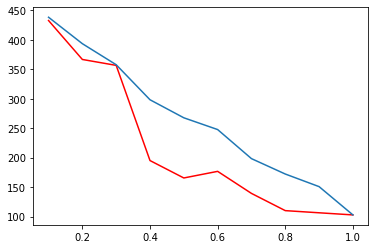

In [15]:
import matplotlib.pyplot as plt

# this value is the total distance between p and 5 closest predicted points to p
resRL = [results[i][0] for i in range(len(results))]
resRAND = [np.mean(results[i][1]) for i in range(len(results))]
plt.plot(budgets, resRL, 'r', budgets, resRAND)
plt.show()

In [ ]:
# we will write the results to BENCHMARK/<test>.csv
f = open('BENCHMARK/hcv_test.csv', 'w')

def write(f,lst):
    for l in lst:
        f.write(str(l))
        f.write(' ')

# first write the number of test points
f.write(str(len(test_env.data)))
f.write('\n')
        
# write the cost
write(f,costs)
f.write('\n')

# write the RL result
write(f,resRL)
f.write('\n')

# finally write the random results
write(f, resRAND)
f.write('\n')

f.close()